<a href="https://colab.research.google.com/github/wildanputra/frauddetection/blob/master/data_analysis_and_PCA_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

## Objective:

*   To detect fraudulent credit card transactions and
*   To understand how to work with imbalanced dataset.

## Dataset :
Sources : https://www.kaggle.com/mlg-ulb/creditcardfraud/

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

# Data Exploration

## import important modules

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mounting dataset from gdrive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset = '/content/drive/My Drive/fraud/creditcard.csv'

In [21]:
df = pd.read_csv(dataset)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Descriptive statistics on the data

In [29]:
print("Time")
print(df.Time.describe())
print("V1")
print(df.Time.describe())
print("Amount")
print(df.Amount.describe())
print("Class")
print(df.Class.describe())
print(df.Class.nunique())
print("ALL")
print(df.describe())

<IPython.core.display.Javascript object>

Time
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
V1
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
Amount
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
Class
count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64
2
ALL
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  

## Use Histogram to visualize

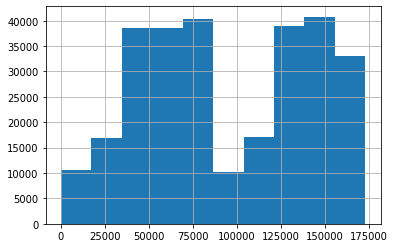

In [30]:
df.Time.hist()

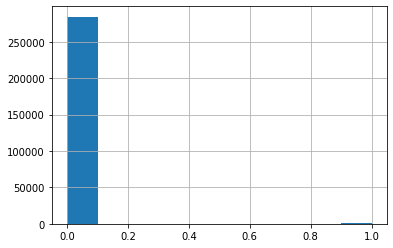

In [31]:
df.Class.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b521a52b0>,
      dtype=object)

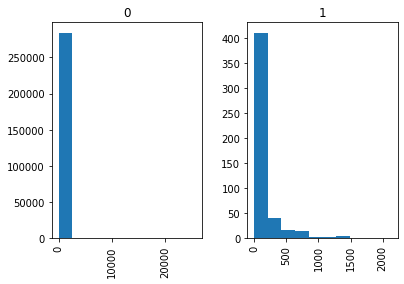

In [32]:
df['Amount'].hist(by=df['Class'])

In [33]:
print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b520a9d30>,
      dtype=object)

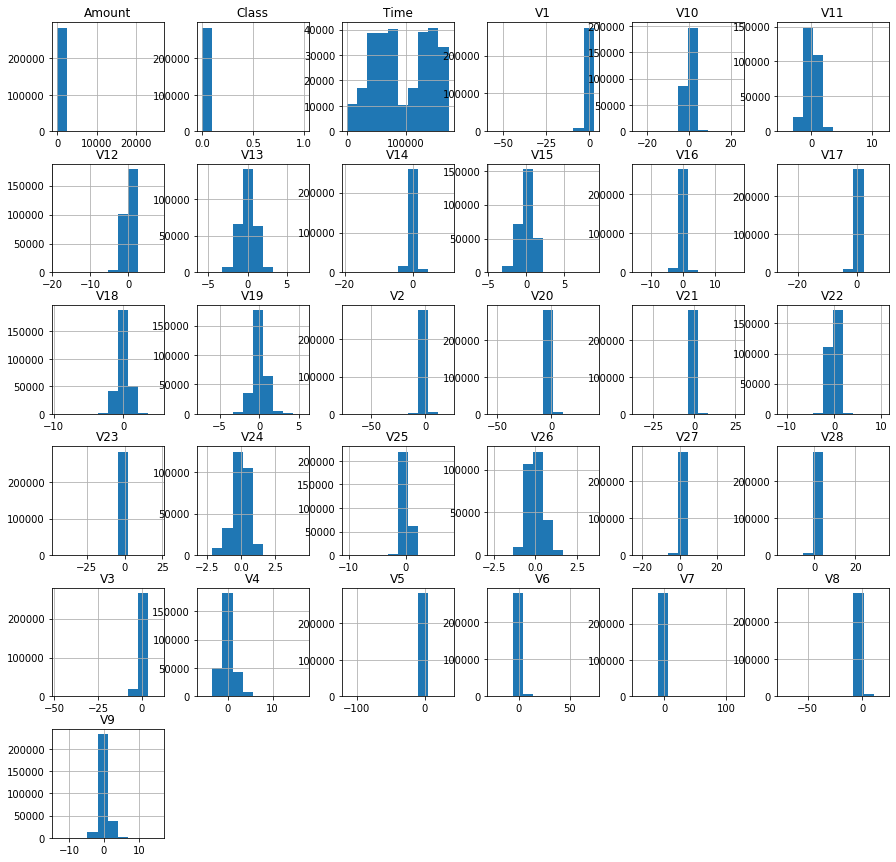

In [34]:
df.hist(figsize=(15,15))

## Check the spread of fraud vs non-fraud on selected variables
This is done to identify variables selection which has good spread of frauds and non frauds

V1 - V2


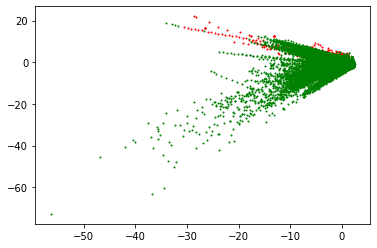

<Figure size 432x288 with 0 Axes>

In [35]:
sample = df[df['Class']==0]
fraud = df[df['Class']==1]
print('V1 - V2')
plt.scatter(fraud['V1'], fraud['V2'],s=1, color='r')
plt.scatter(sample['V1'], sample['V2'], s=1, color='g')
plt.show()
plt.clf()

V1 - V3


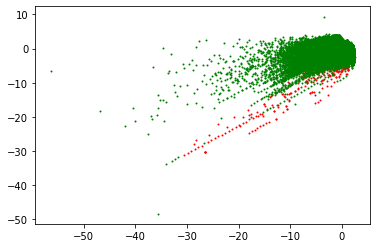

<Figure size 432x288 with 0 Axes>

In [36]:
print('V1 - V3')
plt.scatter(fraud['V1'], fraud['V3'],s=1, color='r')
plt.scatter(sample['V1'], sample['V3'], s=1, color='g')
plt.show()
plt.clf()

V1 - V4


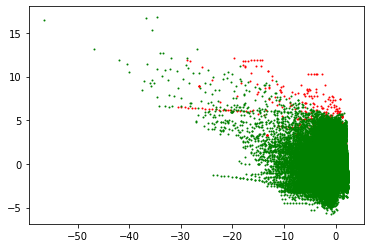

<Figure size 432x288 with 0 Axes>

In [37]:
print('V1 - V4')
plt.scatter(fraud['V1'], fraud['V4'],s=1, color='r')
plt.scatter(sample['V1'], sample['V4'], s=1, color='g')
plt.show()
plt.clf()

## Split the data into train & test data sets using 70:30 mix
The model will be built on training data and will be applied on the test data

In [38]:
# Split The Data with all variables

from sklearn.model_selection import train_test_split

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(199364, 30)
xtest shape
(85443, 30)


## Random Forest

## Smote

## XGboost